In [79]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

# STEP 1. Скачайте датасет.

Download the Adult training data set: http://archive.ics.uci.edu/ml/datasets/Adult
(file adult.data)

In [80]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data

--2019-04-07 19:31:54--  http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data
Распознаётся archive.ics.uci.edu (archive.ics.uci.edu)… 128.195.10.252
Подключение к archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... соединение установлено.
HTTP-запрос отправлен. Ожидание ответа… 200 OK
Длина: 3974305 (3,8M) [application/x-httpd-php]
Сохранение в: «adult.data.6»

adult.data.6        100%[===================>]   3,79M   688KB/s    за 7,8s    

2019-04-07 19:32:02 (495 KB/s) - «adult.data.6» сохранён [3974305/3974305]



In [81]:
!head adult.data

39, State-gov, 77516, Bachelors, 13, Never-married, Adm-clerical, Not-in-family, White, Male, 2174, 0, 40, United-States, <=50K
50, Self-emp-not-inc, 83311, Bachelors, 13, Married-civ-spouse, Exec-managerial, Husband, White, Male, 0, 0, 13, United-States, <=50K
38, Private, 215646, HS-grad, 9, Divorced, Handlers-cleaners, Not-in-family, White, Male, 0, 0, 40, United-States, <=50K
53, Private, 234721, 11th, 7, Married-civ-spouse, Handlers-cleaners, Husband, Black, Male, 0, 0, 40, United-States, <=50K
28, Private, 338409, Bachelors, 13, Married-civ-spouse, Prof-specialty, Wife, Black, Female, 0, 0, 40, Cuba, <=50K
37, Private, 284582, Masters, 14, Married-civ-spouse, Exec-managerial, Wife, White, Female, 0, 0, 40, United-States, <=50K
49, Private, 160187, 9th, 5, Married-spouse-absent, Other-service, Not-in-family, Black, Female, 0, 0, 16, Jamaica, <=50K
52, Self-emp-not-inc, 209642, HS-grad, 9, Married-civ-spouse, Exec-managerial, Husband, White, Male, 0, 0, 45, United-States, >50K
31, 

# Step 2. Поймите формат и зачитайте adult.data в переменную df. Используйте cols чтобы дать нормальные названия колонкам.

Обратите внимание на формат!

In [82]:
cols = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship',
        'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'result']


In [83]:
df = pd.read_csv('adult.data', names=cols, sep=', ', engine='python')


# Сколько мужчин и женщин?

In [84]:
df['sex'].value_counts()


Male      21790
Female    10771
Name: sex, dtype: int64

# Средний возраст мужчин и женщин?

In [85]:
df.groupby('sex').age.mean()


sex
Female    36.858230
Male      39.433547
Name: age, dtype: float64

# Какая доля граждан США (United-States) в данном датасете?

In [86]:
df['native-country'][df['native-country'] == 'United-States'].count() / df.shape[0]


0.895857006848684

# Нарисуйте распределение образования людей (используйте bar plot)

Подпишите график и оси.

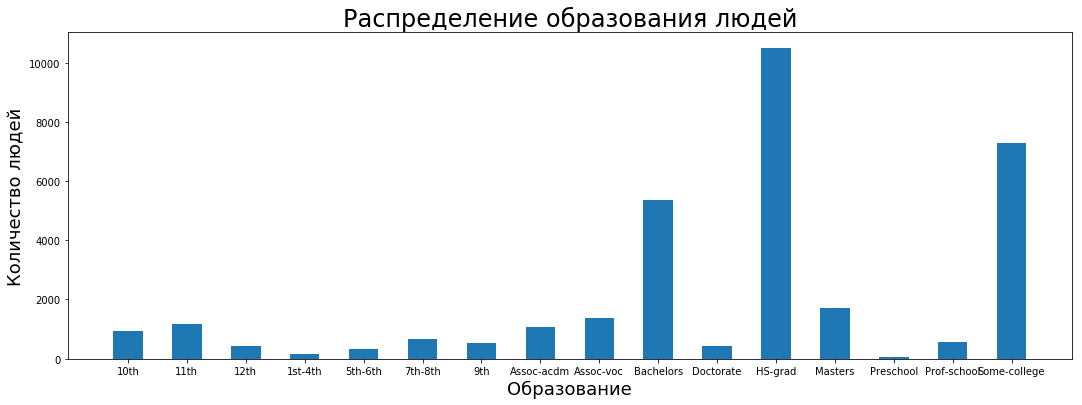

In [87]:
import matplotlib.pyplot as plt
ser = df.groupby(['education']).education.count()
plt.figure(figsize=(18, 6))
plt.bar(ser.index, ser.values, width=0.5)
plt.title('Распределение образования людей', fontsize=24)
plt.xlabel('Образование', fontsize=18)
plt.ylabel('Количество людей', fontsize=18)
plt.show()


# Какое среднее значние и квадратичное отклонение (std) fnlwgt (”final weight”) разведенных (divorced people) людей. Нарисуйте гистрограмму (Какое распределение оно вам напоминает?)

In [88]:
df['fnlwgt'][df['marital-status'] == 'Divorced'].mean()


185802.79045689848

In [89]:
df['fnlwgt'][df['marital-status'] == 'Divorced'].std()


105646.78945933603

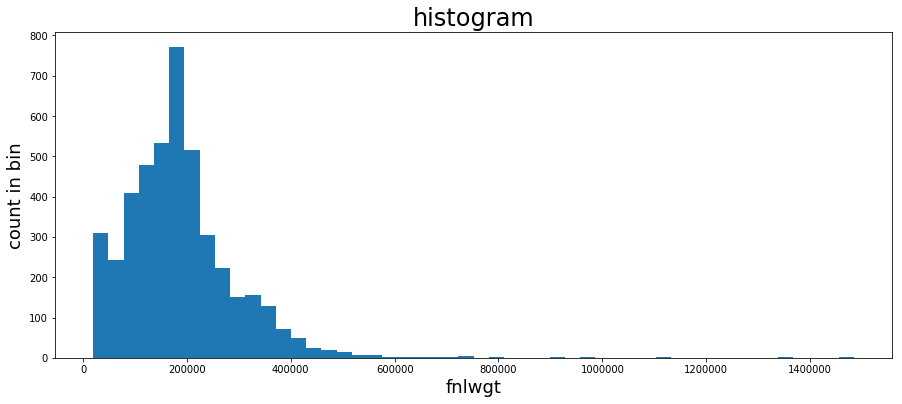

In [90]:
plt.figure(figsize=(15, 6))
plt.hist(df['fnlwgt'][df['marital-status'] == 'Divorced'], bins=50)
plt.title('histogram', fontsize=24)
plt.xlabel('fnlwgt', fontsize=18)
plt.ylabel('count in bin', fontsize=18)
plt.show()


> Ответ: оно мне напоминает распределение хи-квадрат

# Правда ли, что большинство людей, из тех кто получает больше 50k, с высшим образованием  (BSc, MSc, PhD - ????)

In [91]:
df2 = df[df['result'] == '>50K']
df2 ['high education'] = df['education'].apply (lambda x : 'high' if x in ['Bachelors','Masters','Doctorate'] else 'not high')
df2['high education'].value_counts()

/home/alexey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


not high    4355
high        3486
Name: high education, dtype: int64

> Ответ: Нет.

# Сколько в среднем работают люди в неделю в зависимости от education?

In [92]:
df.groupby(['education']).mean()['hours-per-week']


education
10th            37.052519
11th            33.925957
12th            35.780600
1st-4th         38.255952
5th-6th         38.897898
7th-8th         39.366873
9th             38.044747
Assoc-acdm      40.504217
Assoc-voc       41.610709
Bachelors       42.614006
Doctorate       46.973366
HS-grad         40.575374
Masters         43.836332
Preschool       36.647059
Prof-school     47.425347
Some-college    38.852284
Name: hours-per-week, dtype: float64

# Кто больше работает в неделю - мужчины или женщины?

In [93]:
if df['hours-per-week'][df['sex'] == 'Male'].mean() - df['hours-per-week'][df['sex'] == 'Female'].mean() > 0:
    print('мужчины')
else:
    print('женщины')


мужчины


# Кто больше работает в неделю - те кто в отношениях или те кто нет?

In [94]:
df['in relations'] = df['relationship'].apply (lambda x: 'yes' if x in ['Husband','Wife'] else 'no')

In [95]:
df.groupby('in relations').mean()['hours-per-week']

in relations
no     38.022921
yes    43.349096
Name: hours-per-week, dtype: float64

In [96]:
df.drop(columns = 'in relations')


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,result
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


# Из каких стран люди работают farmers/fishers?

In [97]:
df['native-country'][df['occupation'] == 'Farming-fishing'].unique()


array(['United-States', 'Cambodia', 'Poland', 'Guatemala', 'Mexico',
       'England', '?', 'Philippines', 'Italy', 'Puerto-Rico', 'Vietnam',
       'Germany', 'Japan', 'Canada', 'Yugoslavia', 'Cuba', 'Portugal',
       'El-Salvador', 'Hong', 'Ireland', 'France'], dtype=object)

# Сколько максимум работают люди в неделю? Как много таких людей кто работает наибольшее количество часов? Какой у них доход (распечатать)?

In [98]:
maxim = df['hours-per-week'].max()
print (maxim)

99


In [99]:
df2 = df[df['hours-per-week'] == maxim]
df2.shape[0]


85

In [100]:
df_end = pd.DataFrame(data=df2.loc[:, 'result'])
df_end


,result
935,>50K
1172,>50K
1887,>50K
3578,>50K
4086,<=50K
4308,<=50K
4441,>50K
5376,<=50K
5432,<=50K
6618,<=50K
